In [1]:
import torch

In [17]:
from google.colab import drive
drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
%cd /content/drive/MyDrive/Colab Notebooks/Deeplearning_pytorch_Textbook

/content/drive/MyDrive/Colab Notebooks/Deeplearning_pytorch_Textbook


## Tensor의 사용

In [2]:
torch.tensor([[1.,-1.],[1.,-1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [3]:
print(torch.tensor([[1,2],[3,4]]))
print(torch.tensor([[1,2],[3,4]], device = "cuda:0"))
print(torch.tensor([[1,2],[3,4]], dtype = torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [4]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

[[1 2]
 [3 4]]


In [6]:
temp = torch.tensor([[1,2],[3,4]], device = "cuda:0")
print(temp.to("cpu").numpy())

[[1 2]
 [3 4]]


In [7]:
temp = torch.FloatTensor([1,2,3,4,5,6,7])
print(temp[0],temp[1],temp[-1])
print('-'*10)
print(temp[2:5],temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
----------
tensor([3., 4., 5.]) tensor([5., 6.])


In [8]:
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
print(w-v)

tensor([2, 2, 3])


In [10]:
temp = torch.tensor([
    [1,2],[3,4]
])

In [15]:
print(temp.shape)
print(temp.view(4,1))
print(temp.view(-1))
print(temp.view(1,-1))
print(temp.view(-1,1))

torch.Size([2, 2])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


## Data 불러오기

In [23]:
import pandas as pd
data = pd.read_csv("./car_evaluation.csv")
data

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [24]:
#Custom dataset 불러오기

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [26]:
'''
class CustomDataset(Dataset):
  def __init__(self, csv_file):
    self.label = pd.read_csv(csv_file)

  def __len__(self):
    return len(self.label)

  def __getitem__(self,idx):
    sample = torch.tensor(self.label.iloc[idx,0:3]).int()
    label = torch.tensor(self.label.iloc[idx,3]).int()
    return sample, label

tensor_dataset = CustomDataset('../covtype.csv')
dataset = DataLoader(tensor_dataset, batch_size = 4, shuffle=True)

for i, data in enumerate(dataset,0):
  print(i, end='')
  batch = data[0]
  print(batch.size())
  '''

"\nclass CustomDataset(Dataset):\n  def __init__(self, csv_file):\n    self.label = pd.read_csv(csv_file)\n  \n  def __len__(self):\n    return len(self.label)\n\n  def __getitem__(self,idx):\n    sample = torch.tensor(self.label.iloc[idx,0:3]).int()\n    label = torch.tensor(self.label.iloc[idx,3]).int()\n    return sample, label\n\ntensor_dataset = CustomDataset('../covtype.csv')\ndataset = DataLoader(tensor_dataset, batch_size = 4, shuffle=True)\n\nfor i, data in enumerate(dataset,0):\n  print(i, end='')\n  batch = data[0]\n  print(batch.size())\n  "

In [28]:
!pip install requests
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,)) #mean std
])


from torchvision.datasets import MNIST
import requests

download_root = './data/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 83781290.23it/s]


Extracting ./data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST_DATASET/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 119228045.10it/s]


Extracting ./data/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28594960.64it/s]


Extracting ./data/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST_DATASET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 27098902.94it/s]

Extracting ./data/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST_DATASET/MNIST/raw



## 모델 정의

- 단순 신경망

In [36]:
import torch.nn as nn
import torch.functional as F
from torch.nn import Module
model = nn.Linear(in_features = 1, out_features = 1, bias = True) #단순 신경망 정의
model

Linear(in_features=1, out_features=1, bias=True)

- 모듈 정의

In [38]:
class MLP(Module):
  def __init__(self, inputs):
    super(MLP, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = F.sigmoid()

  def forward(self, X):
    X = self.layer(X)
    X = self.activation(X)
    return X

In [47]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size =5),
        nn.ReLU(inplace = True), #기존 input 데이터의 메모리를 제거함. nn.ReLU()보다 메모리 누수가 적다.
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 64, out_channels = 30, kernel_size =5),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2)
    )


    self.layer3 = nn.Sequential(
        nn.Linear(in_features = 30*5*5, out_features = 10, bias = True),
        nn.ReLU(inplace = True),
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0],-1) #x.shape[0] 채널사이즈
    x = self.layer3(x)
    return x

model = MLP()

print('printing children\n')
print(list(model.children()))
print('printing modules\n')
print(list(model.modules()))

printing children

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
printing modules

[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(i

## 모델 파라미터 정의

Loss function
- BCELoss : 이진 분류를 위해 사용
- CrossEntropyLoss : 다중 클래스 분류를 위해 사용
- MSELoss : 회귀 모델에서 사용

Optimizer

- step()을 통해 전달받은 파라미터 업데이트
- parameter별로 다른 기준을 적용 가능
- torch.optim.Optimizer(params, defaults)는 모든 옵티마이저의 기본이 되는 클래스
- zero_grad()는 옵티마이저에 사용된 파라미터들의 기울기를 0으로 만듬
- torch.optim.lr_scheduler는 에포크에 따라 학습률 조절 가능

Learning Rate Scheduler

초기에는 빠른 학습 진행, 전역 최소점 근처에 다다르면 학습률 줄여서 최적점을 찾아갈 수 있도록 한다.

- optim.lr_scheduler.LambdaLR: 람다 함수로 학습률 설정
- .StepLR: 특정 step마다 학습률을 감마비율만큼 감소
- .MultiStepLR: StepLR과 비슷하나, 지정된 epoch에만 감마비율로 감소 (not step)
- .ExponentialLR: 에포크마다 이전 학습률에 감마만큼 곱해줌
- .CosineAnnealingLR : 학습률을 코사인 함수의 형태처럼 변화시킴. -> 학습률이 커지기도 작아지기도 한다.
- .ReduceLROnPlateau: 학습이 잘 되고 있는지 아닌지에 따라 동적으로 학습률 변화가 가능

In [49]:
'''
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer = optimizer, lr_lambda = lambda epoch: 0.95 ** epoch) #lambda함수 지정으로 epoch의 제곱만큼 lr 줄여준다.
for epoch in range(1, 101):
  for x, y in dataloader:
    optimizer.zero_grad()

loss_fn(model(x),y).backward()
optimizer.step()
scheduler.step()
'''


'\nfrom torch.optim import optimizer\ncriterion = torch.nn.MSELoss()\noptimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)\nscheduler = torch.optim.lr_scheduler.LambdaLR(optimizer = optimizer, lr_lambda = lambda epoch: 0.95 ** epoch) #lambda함수 지정으로 epoch의 제곱만큼 lr 줄여준다.\nfor epoch in range(1, 101):\n  for x, y in dataloader:\n    optimizer.zero_grad()\n\nloss_fn(model(x),y).backward()\noptimizer.step()\nscheduler.step()\n'

학습 절차

1. 모델, 손실함수, 옵티마이저 정의
2. optimizer.zero_grad(): 전방향 학습, 기울기 초기화
3. output = model(input): 출력 계산
4. loss = loss_fn(output, target): 오차 계산
5. loss.backward(): 역전파 학습
6. optimizer.step() : 기울기 업데이트

In [54]:
# 기울기값이 누적되는 RNN을 제외하고는 optimizer.zero_grad()로 미분값을 초기화해줘야함.
# 모델 훈련 예시 코드
"""
for epoch in range(100):
  y_hat = model(x_train) # forward pass
  loss = criterion(y_hat, y_train) #loss값 계산
  optimizer.zero_grad() #기울기 초기화
  loss.backward() #역전파 계산
  optimizer.step() #기울기 업데이트

"""

'\nfor epoch in range(100):\n  y_hat = model(x_train) # forward pass\n  loss = criterion(y_hat, y_train) #loss값 계산\n  optimizer.zero_grad() #기울기 초기화\n  loss.backward() #역전파 계산\n  optimizer.step() #기울기 업데이트\n\n'

## 모델 평가

In [56]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.1 MB/s eta 0:00:00


In [62]:
import torch
import torchmetrics
"""
preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)"""

'\npreds = torch.randn(10, 5).softmax(dim=-1)\ntarget = torch.randint(5, (10,))\n\nacc = torchmetrics.functional.accuracy(preds, target)'

In [64]:
"""metric = torchmetrics.Accuracy() #모델 평가 초기화

for i in range(n_batches):
  preds = torch.randn(10,5).softmax(dim=-1)
  target = torch.randint(5, (10,))

  acc = metric(preds, target)
  print(f'Accuracy on batch {i} : {acc}') # 현재 배치에서 모델 평가(정확도)

acc = metric.compute()
print(f'Accuracy on all data: {acc}') #모든 배치에서 모델 평가(정확도)"""

"metric = torchmetrics.Accuracy() #모델 평가 초기화\n\nfor i in range(n_batches):\n  preds = torch.randn(10,5).softmax(dim=-1)\n  target = torch.randint(5, (10,))\n\n  acc = metric(preds, target)\n  print(f'Accuracy on batch {i} : {acc}') # 현재 배치에서 모델 평가(정확도)\n\nacc = metric.compute()\nprint(f'Accuracy on all data: {acc}') #모든 배치에서 모델 평가(정확도)"

## 모니터링 (tensorboard) 사용하자

In [65]:
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
dataset = pd.read_csv('./car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- output의 분포 확인

<Axes: ylabel='output'>

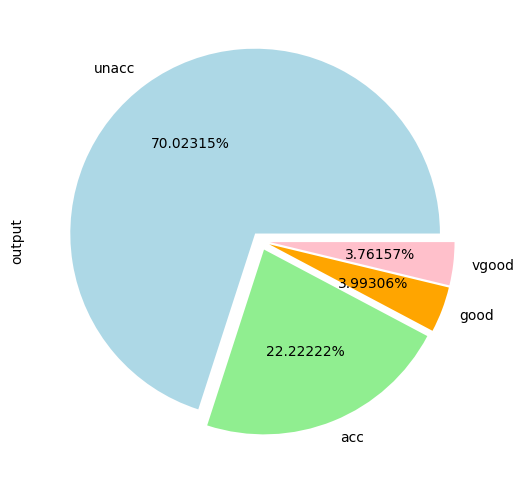

In [68]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['figure.figsize']=fig_size
dataset.output.value_counts().plot(kind='pie', autopct = '%0.05f%%', colors = ['lightblue','lightgreen','orange','pink'],explode = (0.05, 0.05, 0.05, 0.05))

In [72]:
categorical_columns = list(dataset.columns[:-1])

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values #cat.codes 단어 -> 넘파이(숫자)배열로 변환
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety],1) #넘파이 객체 합칠때 사용
categorical_data[:10]


array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [74]:
# stack vs concatenate

a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[5,6],[7,8],[9,10]])

print(np.concatenate((a,b),axis = 0))
print(np.concatenate((a,b),axis = 0).shape)
print('-'*10)

print(np.stack((a,b),axis = 0))
print(np.stack((a,b),axis = 0).shape)


[[1 2]
 [3 4]
 [5 6]
 [7 8]]
(4, 2)
----------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
(2, 2, 2)


- concatenate는 차원을 유지하면서 합쳤다면,
- stack은 상위단계의 차원을 생성하고, 그 안에 두 array의 차원을 동일하게 가져감.

In [75]:
print(np.concatenate((a,c,),axis =0))
print(np.concatenate((a,c,),axis =0).shape)


[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
(5, 2)


In [77]:
print(np.stack((a,c),axis = 0)) #오류남.두 넘파이 배열의 차원이 동일해야.

ValueError: ignored

In [78]:
# array -> tensor

categorical_data =  torch.tensor(categorical_data, dtype = torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [79]:
dataset.output

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: output, Length: 1728, dtype: object

In [83]:
#get dummys로 숫자로 변환
output = pd.get_dummies(dataset.output)
print(output)
print('*'*40)
output = output.values
print(output)
print('*'*40)
print(output.shape)
output = torch.tensor(output).flatten() #1열로 변환.
print('*'*40)

print(categorical_data.shape)
print('*'*40)
print(output.shape)

      acc  good  unacc  vgood
0       0     0      1      0
1       0     0      1      0
2       0     0      1      0
3       0     0      1      0
4       0     0      1      0
...   ...   ...    ...    ...
1723    0     1      0      0
1724    0     0      0      1
1725    0     0      1      0
1726    0     1      0      0
1727    0     0      0      1

[1728 rows x 4 columns]
****************************************
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]
****************************************
(1728, 4)
****************************************
torch.Size([1728, 6])
****************************************
torch.Size([6912])


- get_dummies

In [84]:
data = {
    'gender' : ['male','female','male'],
    'weight' : [72,55,68],
    'nation' : ['Japan','Korea','Austrailia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Austrailia


In [85]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Austrailia,nation_Japan,nation_Korea
0,72,0,1,0,1,0
1,55,1,0,0,0,1
2,68,0,1,1,0,0


In [87]:
# tensor 차원 변경

a = np.array([[1,2],[3,4]])
print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [91]:
# 범주형 column을 n차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50,(col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [96]:
print(len(output
          ))

6912


In [97]:
total_records = 1728
test_records = int(total_records*.2)
categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = output[:total_records - test_records]
test_outputs = output[total_records - test_records:total_records]


In [98]:
print(len(categorical_train_data))
print(len(categorical_test_data))
print(len(train_outputs))
print(len(test_outputs))


1383
345
1383
345


In [99]:
#NETWORK

class Model(nn.Module):
  def __init__(self, embedding_size, output_size, layers, p=0.4):
    super(Model, self).__init__()
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols

    for i in layers:
      all_layers.append(nn.Linear(input_size , i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size = i

    all_layers.append(nn.Linear(layers[-1],output_size))
    self.layers = nn.Sequential(*all_layers)
  def forward(self, x_categorical):
    embeddings = []
    for i, e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)
    x = self.layers(x)
    return x

In [100]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p = 0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [101]:
#parameter

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [103]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype = torch.int64)
for i in range(epochs):
  i = i+1 #숫자 1부터시작하게 맞춰주는 용도
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss)

  if i%25 == 1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward()
  optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.55110055
epoch:  26 loss: 0.56020290
epoch:  51 loss: 0.55084765
epoch:  76 loss: 0.54577512
epoch: 101 loss: 0.54498857
epoch: 126 loss: 0.54548097
epoch: 151 loss: 0.53876680
epoch: 176 loss: 0.53203261
epoch: 201 loss: 0.52502537
epoch: 226 loss: 0.52260131
epoch: 251 loss: 0.51251894
epoch: 276 loss: 0.53125370
epoch: 301 loss: 0.52155960
epoch: 326 loss: 0.52578807
epoch: 351 loss: 0.51345909
epoch: 376 loss: 0.51485944
epoch: 401 loss: 0.51504463
epoch: 426 loss: 0.50728250
epoch: 451 loss: 0.50347078
epoch: 476 loss: 0.50716841
epoch: 500 loss: 0.5062914491


In [105]:
test_outputs = test_outputs.to(device = device, dtype = torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data)
  y_val = y_val.to(device = device)
  loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.47564888


In [106]:
print(y_val[:5])

tensor([[ 2.8680,  1.8224, -4.6967, -4.3934],
        [ 2.6311,  2.2307, -3.8803, -3.7956],
        [ 2.9149,  2.0713, -4.6240, -4.3260],
        [ 2.7807,  2.0977, -4.7225, -4.1970],
        [ 3.0326,  1.5922, -4.1855, -4.0297]], device='cuda:0')


In [109]:
y_val = y_val.to(device = 'cpu')
y_val = np.argmax(y_val, axis = 1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [112]:
#정확도 확인
test_outputs = test_outputs.to(device='cpu')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[255   4]
 [ 72  14]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       259
           1       0.78      0.16      0.27        86

    accuracy                           0.78       345
   macro avg       0.78      0.57      0.57       345
weighted avg       0.78      0.78      0.72       345

0.7797101449275362
